In [35]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# reading the csv which has image name and label
df = pd.read_csv('label.csv')

df.head()

,Number,Id,Label
0,0,IMG_1118.JPG,0
1,1,IMG_1128.JPG,0
2,2,IMG_1138.JPG,0
3,3,IMG_1148.JPG,0
4,4,IMG_1158.JPG,0


In [37]:
# dropping the number column from the dataframe
df = df.drop('Number', axis=1)

df.head()

,Id,Label
0,IMG_1118.JPG,0
1,IMG_1128.JPG,0
2,IMG_1138.JPG,0
3,IMG_1148.JPG,0
4,IMG_1158.JPG,0


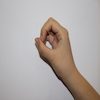

In [38]:
# displaying an image from the given path
from PIL import Image
img = Image.open('./Sign-Language-Digits-Dataset/' + str(df['Label'][0]) + '/' + str(df['Id'][0]))
img

In [39]:
# getting and storing resolutions of all images in res
res = []
for i in range(len(df)):
    img = Image.open('./Sign-Language-Digits-Dataset/'+str(df['Label'][i]) + '/' + str(df['Id'][i]))
    res.append(img.size)

res

[(100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),

In [40]:
# appending the image size to the dataframe
df['size'] = res

In [41]:
# displaying the number of images in each class
df['size'].value_counts()

(100, 100)      2059
(3024, 3024)       3
Name: size, dtype: int64

In [42]:
# dropping the images with size (3024,3024)
df = df[df['size'] != (3024, 3024)]
df['size'].value_counts()

(100, 100)    2059
Name: size, dtype: int64

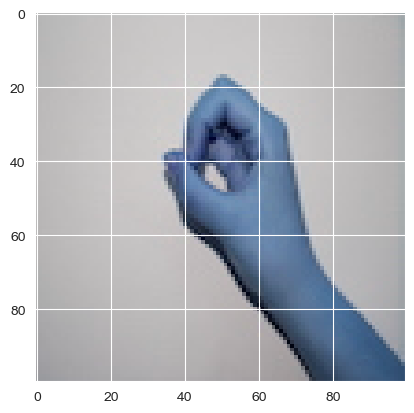

In [43]:
# displaying an image using opencv
import cv2
img = cv2.imread('./Sign-Language-Digits-Dataset/' + str(df['Label'][0]) + '/' + str(df['Id'][0]))
plt.imshow(img)

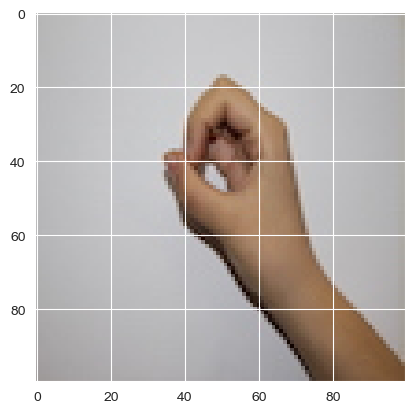

In [44]:
# fixing the colour channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [45]:
# getting all the images from the folder
import os
# getting all the images from the folder
images = []
for i in range(len(df)):
    img = cv2.imread('./Sign-Language-Digits-Dataset/'+ str(df['Label'].iloc[i]) + '/' + str(df['Id'].iloc[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
# print(images)

In [46]:
# # slicing the first 10 images
# images = images[:10]

# images

In [47]:
# converting all the images to grayscale
gray_images = []
for i in range(len(images)):
    gray_images.append(cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY))

(100, 100)


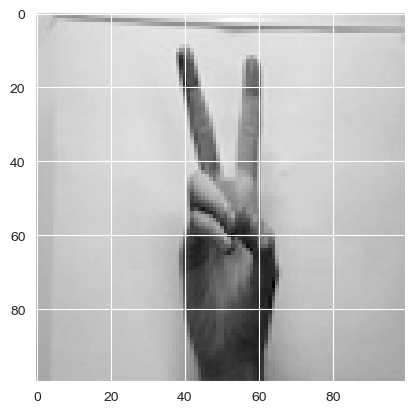

In [48]:
# showing a random image
plt.imshow(gray_images[420], cmap='gray')
# show the dimensions of the image
print(gray_images[420].shape)

In [49]:
# adding the images to the dataframe
df['Images'] = gray_images

df

,Id,Label,size,Images
0,IMG_1118.JPG,0,"(100, 100)","[[180, 181, 183, 183, 184, 184, 186, 187, 186,..."
1,IMG_1128.JPG,0,"(100, 100)","[[177, 178, 179, 180, 181, 182, 184, 185, 185,..."
2,IMG_1138.JPG,0,"(100, 100)","[[178, 179, 180, 180, 181, 182, 183, 184, 185,..."
3,IMG_1148.JPG,0,"(100, 100)","[[183, 183, 184, 185, 186, 187, 188, 189, 190,..."
4,IMG_1158.JPG,0,"(100, 100)","[[183, 185, 186, 186, 187, 188, 188, 189, 190,..."
...,...,...,...,...
2057,IMG_5949.JPG,9,"(100, 100)","[[114, 113, 115, 116, 114, 115, 117, 116, 118,..."
2058,IMG_5959.JPG,9,"(100, 100)","[[130, 135, 135, 135, 144, 155, 161, 161, 162,..."
2059,IMG_5969.JPG,9,"(100, 100)","[[146, 147, 149, 151, 152, 154, 156, 158, 159,..."
2060,IMG_5980.JPG,9,"(100, 100)","[[127, 130, 132, 133, 136, 137, 137, 138, 137,..."


In [50]:
# splitting the dataframe into train and test from the dataframe
# importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df['Images'],df['Label'], test_size = 0.25, random_state = 42)

In [51]:
# displaying the train and test dataframes
print(X_train)
print(X_test)
print(y_train)
print(y_test)

439     [[140, 142, 141, 145, 146, 144, 149, 149, 149,...
271     [[137, 136, 137, 140, 143, 145, 148, 150, 155,...
244     [[139, 142, 143, 145, 149, 151, 153, 156, 156,...
998     [[101, 103, 105, 107, 108, 109, 111, 112, 113,...
1854    [[124, 125, 127, 129, 131, 133, 135, 136, 141,...
                              ...                        
1639    [[122, 123, 125, 126, 127, 128, 130, 131, 132,...
1095    [[125, 127, 129, 130, 130, 129, 130, 132, 132,...
1130    [[148, 151, 153, 155, 158, 160, 162, 165, 165,...
1294    [[128, 129, 130, 132, 133, 135, 137, 138, 140,...
860     [[147, 149, 151, 153, 154, 155, 158, 160, 160,...
Name: Images, Length: 1544, dtype: object
1298    [[123, 126, 127, 128, 131, 133, 135, 138, 141,...
591     [[96, 97, 99, 100, 102, 104, 106, 108, 108, 11...
1318    [[123, 124, 126, 128, 129, 131, 133, 133, 135,...
1067    [[144, 146, 149, 151, 153, 154, 155, 156, 156,...
29      [[136, 138, 140, 142, 145, 147, 149, 151, 153,...
                              

In [52]:
# flattening the images
X_train = [i.flatten() for i in X_train]
X_test = [i.flatten() for i in X_test]

In [53]:
# displaying the unique shapes of the images
print(np.unique([i.shape for i in X_train]))
print(np.unique([i.shape for i in X_test]))

[10000]
[10000]


In [54]:
X_train

[array([140, 142, 141, ..., 108, 107, 106], dtype=uint8),
 array([137, 136, 137, ..., 110, 108, 107], dtype=uint8),
 array([139, 142, 143, ..., 125, 123, 122], dtype=uint8),
 array([101, 103, 105, ..., 101,  99,  98], dtype=uint8),
 array([124, 125, 127, ..., 128, 126, 125], dtype=uint8),
 array([132, 134, 136, ..., 123, 121, 120], dtype=uint8),
 array([175, 176, 176, ..., 152, 151, 151], dtype=uint8),
 array([172, 175, 176, ..., 166, 166, 165], dtype=uint8),
 array([127, 129, 130, ...,  92,  91,  90], dtype=uint8),
 array([115, 117, 118, ..., 100,  99,  97], dtype=uint8),
 array([121, 121, 122, ..., 114, 113, 112], dtype=uint8),
 array([172, 170, 170, ..., 155, 153, 152], dtype=uint8),
 array([124, 122, 123, ..., 118, 116, 115], dtype=uint8),
 array([131, 133, 134, ..., 107, 105, 104], dtype=uint8),
 array([104, 105, 107, ..., 110, 107, 108], dtype=uint8),
 array([107, 107, 108, ..., 135, 134, 133], dtype=uint8),
 array([177, 176, 168, ..., 165, 165, 164], dtype=uint8),
 array([122, 1

In [55]:
# implementing pca on the train data
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(n_components=0.95)

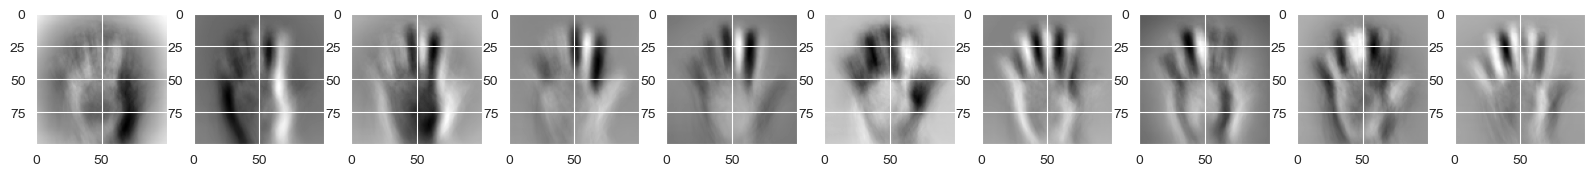

In [56]:
# showing the eigenfaces
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(pca.components_[i].reshape(100, 100), cmap='gray')

In [57]:
print(pca.n_components_)

537


In [58]:
# transforming the train and test data
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [59]:
# applying 1-NN on the train and test data
# importing the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
# predicting the test data
y_pred = knn.predict(X_test)

<AxesSubplot: >

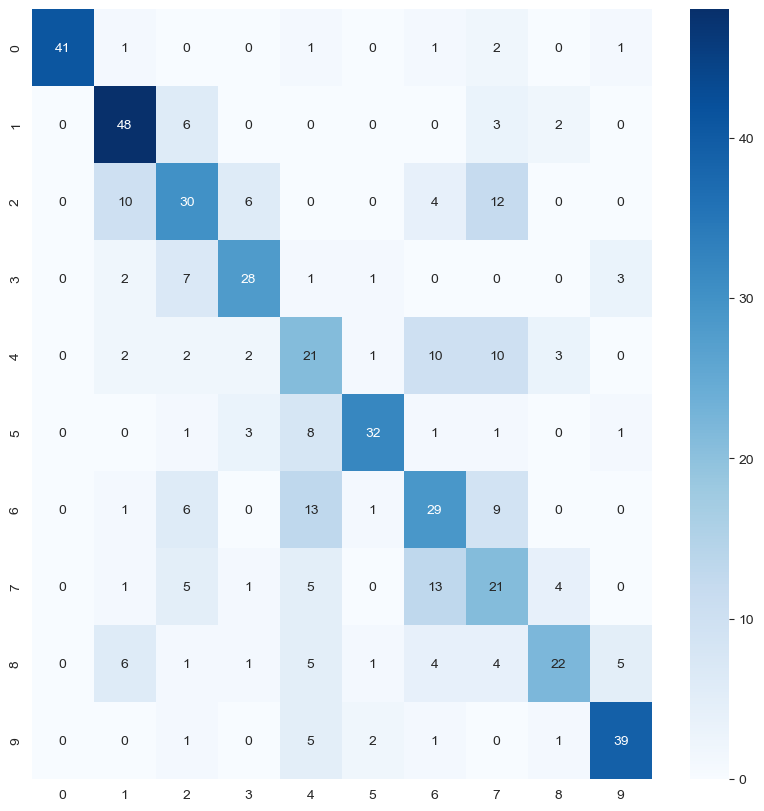

In [61]:

# display the confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


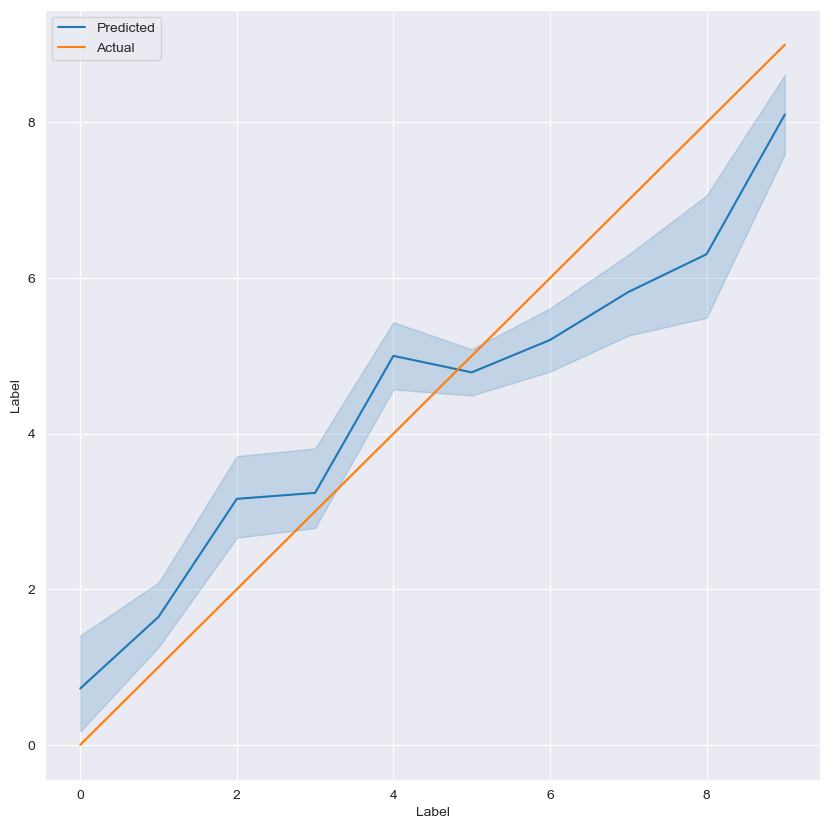

In [62]:
# actual vs predicted values
plt.figure(figsize=(10, 10))
sns.lineplot(x=y_test, y=y_pred, label='Predicted')
sns.lineplot(x=y_test, y=y_test, label='Actual')
plt.legend()

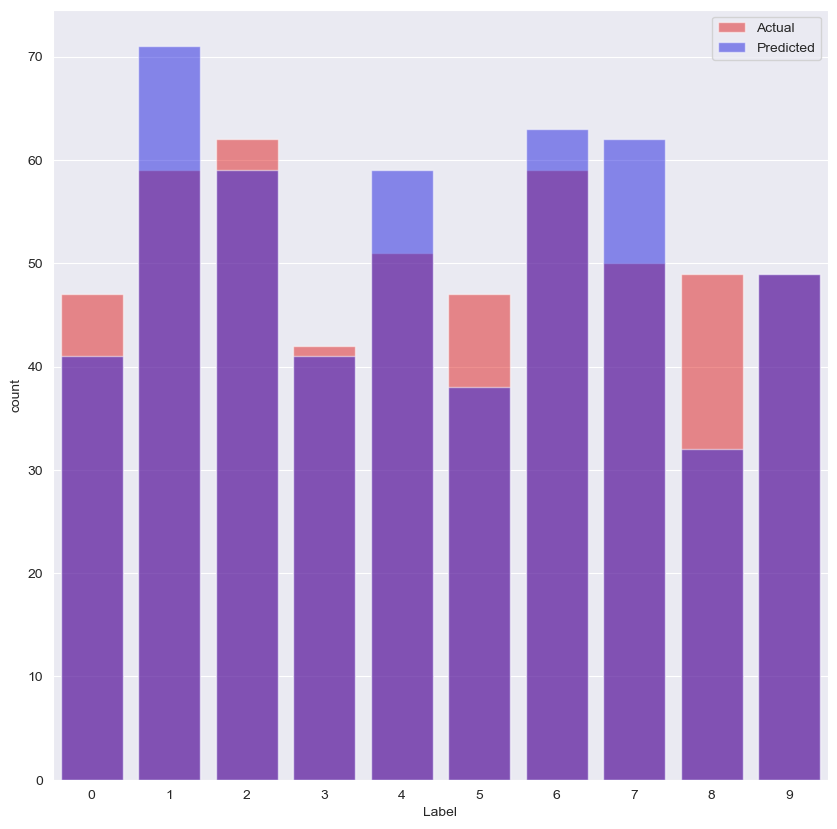

In [63]:
# plot the bar plot between count of actual and predicted labels
plt.figure(figsize=(10, 10))
sns.countplot(x=y_test, label='Actual', color='red', alpha=0.5)
sns.countplot(x=y_pred, label='Predicted', color='blue', alpha=0.5)
plt.legend()

In [64]:
# displaying the accuracy
print(knn.score(X_test, y_test))

0.6038834951456311


In [65]:
# applying logistic regression on the train and test data
# importing the LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred = log_reg.predict(X_test)

In [67]:
print(log_reg.score(X_test, y_test))

0.7223300970873786


In [68]:
# function to return accuracy in 1-NN and Logistic Regression
def accuracy(image, label):
    # dividing the dataframe into train and test from the dataframe
    # importing the train_test_split from sklearn
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        image,label, test_size = 0.25, random_state = 42)
    # flattening the images
    X_train = [i.flatten() for i in X_train]
    X_test = [i.flatten() for i in X_test]
    # implementing pca on the train data
    from sklearn.decomposition import PCA
    pca = PCA(n_components=0.95)
    pca.fit(X_train)
    # transforming the train and test data
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    # applying 1-NN on the train and test data
    # importing the KNeighborsClassifier from sklearn
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    # predicting the test data
    y_pred = knn.predict(X_test)
    # displaying the accuracy
    #print('1-NN Accuracy: ', knn.score(X_test, y_test))
    # applying logistic regression on the train and test data
    # importing the LogisticRegression from sklearn
    from sklearn.linear_model import LogisticRegression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    #print('Logistic Regression Accuracy: ', log_reg.score(X_test, y_test))
    return (knn.score(X_test, y_test), log_reg.score(X_test, y_test))


In [69]:
# picking 2 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(2).tolist()
knn_2_accuracy, log_reg_2_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_2_accuracy, log_reg_2_accuracy)


0.9519230769230769 0.9615384615384616


In [70]:
# picking 4 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(4).tolist()
knn_4_accuracy, log_reg_4_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_4_accuracy, log_reg_4_accuracy)

0.7294685990338164 0.8454106280193237


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
# picking 6 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(6).tolist()
knn_6_accuracy, log_reg_6_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_6_accuracy, log_reg_6_accuracy)

0.8932038834951457 0.8543689320388349


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
# picking 8 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(8).tolist()
knn_8_accuracy, log_reg_8_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_8_accuracy, log_reg_8_accuracy)

0.6504854368932039 0.7411003236245954


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
# picking 10 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(10).tolist()
knn_10_accuracy, log_reg_10_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_10_accuracy, log_reg_10_accuracy)

0.6084142394822006 0.7572815533980582


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


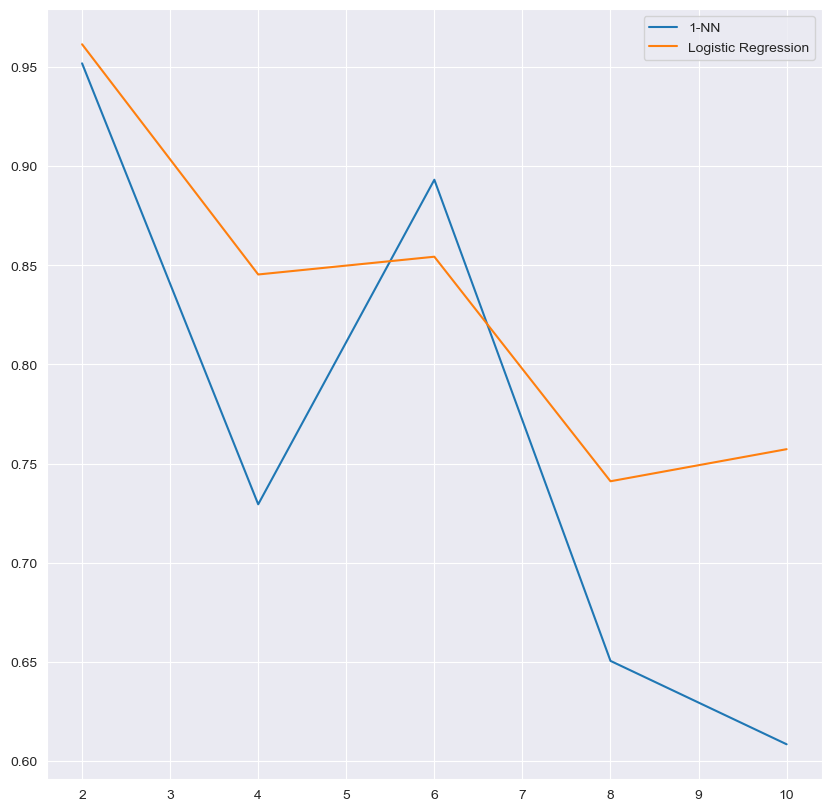

In [74]:
# plotting the accuracy of 1-NN and Logistic Regression
plt.figure(figsize=(10, 10))
sns.lineplot(x=[2, 4, 6, 8, 10], y=[knn_2_accuracy, knn_4_accuracy, knn_6_accuracy, knn_8_accuracy, knn_10_accuracy], label='1-NN')
sns.lineplot(x=[2, 4, 6, 8, 10], y=[log_reg_2_accuracy, log_reg_4_accuracy, log_reg_6_accuracy, log_reg_8_accuracy, log_reg_10_accuracy], label='Logistic Regression')
plt.legend()
plt.show()

In [38]:
# picking 2 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(2).tolist()
knn_2_accuracy, log_reg_2_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_2_accuracy, log_reg_2_accuracy)


0.7596153846153846 0.8942307692307693


c:\Python\Python390\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# picking 4 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(4).tolist()
knn_4_accuracy, log_reg_4_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_4_accuracy, log_reg_4_accuracy)

0.6948051948051948 0.8636363636363636


c:\Python\Python390\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# picking 6 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(6).tolist()
knn_6_accuracy, log_reg_6_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_6_accuracy, log_reg_6_accuracy)

0.7281553398058253 0.8398058252427184


c:\Python\Python390\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# picking 8 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(8).tolist()
knn_8_accuracy, log_reg_8_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_8_accuracy, log_reg_8_accuracy)

0.6634304207119741 0.7896440129449838


c:\Python\Python390\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# picking 10 random labels form the dataframe and storing them in a list
random_labels = df['Label'].sample(10).tolist()
knn_10_accuracy, log_reg_10_accuracy = accuracy(df[df['Label'].isin(random_labels)]['Images'], df[df['Label'].isin(random_labels)]['Label'])
print(knn_10_accuracy, log_reg_10_accuracy)

0.631578947368421 0.7146814404432132


c:\Python\Python390\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


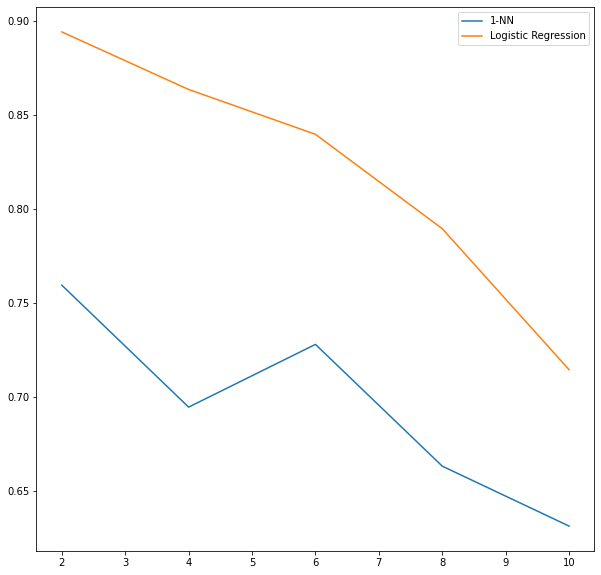

In [43]:
# plotting the accuracy of 1-NN and Logistic Regression
plt.figure(figsize=(10, 10))
sns.lineplot(x=[2, 4, 6, 8, 10], y=[knn_2_accuracy, knn_4_accuracy, knn_6_accuracy, knn_8_accuracy, knn_10_accuracy], label='1-NN')
sns.lineplot(x=[2, 4, 6, 8, 10], y=[log_reg_2_accuracy, log_reg_4_accuracy, log_reg_6_accuracy, log_reg_8_accuracy, log_reg_10_accuracy], label='Logistic Regression')
plt.legend()
plt.show()